## Data Importing

In [1]:
# Importing modules
import pandas as pd
import os

# import data
from datetime import datetime
begin = datetime.now()
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv/train.csv')
train = pd.DataFrame(train)
## data=data.dropna(subset=['title','text'])
train['title'] = train['title'].astype("string")
train["text"] = train["text"].astype("string")
# test["author"] = test["author"].astype("string")

train = train.fillna(' ')
# # check data
print(train.shape)
train.head(10)

train.drop('author', axis = 1, inplace= True)

# making dictionary {id:text}
text_dict = {}
for i in range(0, len(train)):
    text_dict[train.id[i]] = train.text[i] #using text 
    
text_dict   

(20800, 5)


{0: 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing 

In [2]:
papers = pd.DataFrame.from_dict(text_dict, orient='index', columns=['content'])
papers.head()
papers.reset_index(drop=True)

content
0      House Dem Aide: We Didn’t Even See Comey’s Let...
1      Ever get the feeling your life circles the rou...
2      Why the Truth Might Get You Fired October 29, ...
3      Videos 15 Civilians Killed In Single US Airstr...
4      Print \nAn Iranian woman has been sentenced to...
...                                                  ...
20795  Rapper T. I. unloaded on black celebrities who...
20796  When the Green Bay Packers lost to the Washing...
20797  The Macy’s of today grew from the union of sev...
20798  NATO, Russia To Hold Parallel Exercises In Bal...
20799    David Swanson is an author, activist, journa...

[20800 rows x 1 columns]

## Data Cleaning and Pre-processing

In [3]:
import re
import string

def cleanText(text):
        text =  re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', text)
        text =  re.sub('[^A-Za-z0-9 ]+', '', text)
        text = text.lower()
        text = text.strip() #remove spaces to standardise especially if there are now emty rows
        return text
papers_clean = pd.DataFrame(papers.content.apply(lambda x: cleanText(x)))
papers_clean

content
0      house dem aide we didnt even see comeys letter...
1      ever get the feeling your life circles the rou...
2      why the truth might get you fired october 29 2...
3      videos 15 civilians killed in single us airstr...
4      print an iranian woman has been sentenced to s...
...                                                  ...
20795  rapper t i unloaded on black celebrities who m...
20796  when the green bay packers lost to the washing...
20797  the macys of today grew from the union of seve...
20798  nato russia to hold parallel exercises in balk...
20799  david swanson is an author activist journalist...

[20800 rows x 1 columns]

In [4]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers_clean.content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['house', 'dem', 'aide', 'we', 'didnt', 'even', 'see', 'comeys', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'by', 'darrell', 'lucus', 'on', 'october', 'subscribe', 'jason', 'chaffetz', 'on', 'the', 'stump', 'in', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'under', 'creative', 'commonsby', 'license', 'with', 'apologies', 'to', 'keith', 'olbermann', 'there', 'is', 'no', 'doubt', 'who', 'the', 'worst', 'person', 'in', 'the', 'world', 'is', 'this', 'weekfbi', 'director', 'james', 'comey', 'but', 'according', 'to', 'house', 'democratic', 'aide', 'it', 'looks', 'like', 'we', 'also', 'know', 'who', 'the', 'secondworst', 'person', 'is', 'as', 'well', 'it', 'turns', 'out', 'that', 'when', 'comey', 'sent', 'his', 'nowinfamous', 'letter', 'announcing', 'that', 'the', 'fbi', 'was', 'looking', 'into', 'emails', 'that', 'may', 'be', 'related', 'to', 'hillary', 'clintons', 'email', 'server', 'the', 'ranking', 'democrats', 'on', 'the', 'relevant',

In [6]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [5]:
# NLTK Stop words
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [7]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
#Form Trigrams
data_words_trigrams = make_trigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['even', 'see', 'tweet', 'subscribe', 'available', 'creative', 'commonsby', 'license', 'apology', 'doubt', 'bad', 'person', 'accord', 'aide', 'look', 'also', 'know', 'secondworst', 'person', 'well', 'turn', 'send', 'nowinfamous', 'letter', 'announce', 'look', 'email', 'may', 'related', 'hillary', 'clinton', 'rank', 'relevant', 'committee', 'hear', 'find', 'know', 'notify', 'republican', 'chairman', 'democratic', 'rank', 'member', 'agency', 'review', 'email', 'recently', 'discover', 'order', 'see', 'long', 'letter', 'go', 'set', 'political', 'world', 'inform', 'learn', 'existence', 'email', 'investigation', 'case', 'reopened_jason_chaffetz', 'course', 'know', 'case', 'actually', 'say', 'review', 'email', 'light', 'unrelated', 'know', 'anthony_weiners_sexting', 'apparently', 'little', 'thing', 'fact', 'already', 'vow', 'initiate', 'raft', 'investigation', 'least', 'year', 'worth', 'possibly', 'entire', 'term', 'worth', 'apparently', 'chaffetz', 'think', 'already', 'work', 'himresulting'

In [8]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 3), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 8), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 4), (49, 1), (50, 4), (51, 1), (52, 1), (53, 1), (54, 2), (55, 2), (56, 1), (57, 2), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 1), (82, 8), (83, 1), (84, 1), (85, 2), (86, 2), (87, 4), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 3), (94, 1), (95, 1), (96, 4), (97, 4), (98, 1), (99, 4), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 3), (109, 1), (110, 1)

## Baseline Model 

In [9]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, #from kmeans
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [10]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"say" + 0.015*"trump" + 0.011*"people" + 0.009*"go" + 0.008*"would" + '
  '0.008*"election" + 0.007*"vote" + 0.006*"s" + 0.006*"make" + 0.006*"think"'),
 (1,
  '0.014*"say" + 0.009*"would" + 0.009*"year" + 0.006*"company" + '
  '0.006*"government" + 0.006*"percent" + 0.005*"new" + 0.005*"make" + '
  '0.005*"also" + 0.005*"state"'),
 (2,
  '0.012*"say" + 0.009*"email" + 0.007*"report" + 0.007*"would" + 0.006*"case" '
  '+ 0.006*"official" + 0.005*"government" + 0.005*"state" + '
  '0.005*"investigation" + 0.005*"also"'),
 (3,
  '0.013*"say" + 0.007*"make" + 0.006*"year" + 0.006*"time" + 0.006*"go" + '
  '0.005*"people" + 0.005*"take" + 0.005*"know" + 0.004*"would" + 0.004*"get"'),
 (4,
  '0.032*"say" + 0.008*"police" + 0.007*"people" + 0.006*"attack" + '
  '0.006*"official" + 0.005*"kill" + 0.005*"year" + 0.005*"report" + '
  '0.005*"take" + 0.005*"city"')]


In [11]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3258150170427861


<BarContainer object of 10 artists>
<BarContainer object of 10 artists>
<BarContainer object of 10 artists>
<BarContainer object of 10 artists>
<BarContainer object of 10 artists>


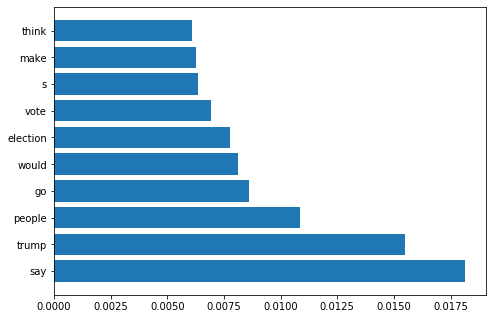

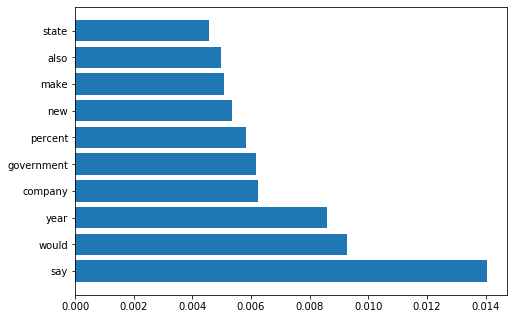

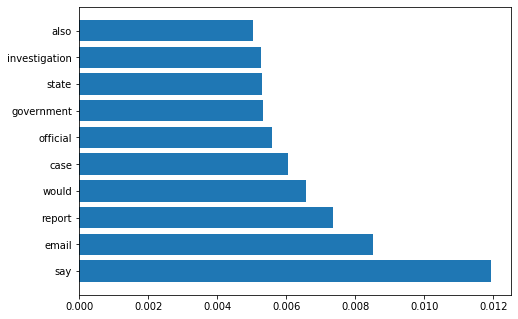

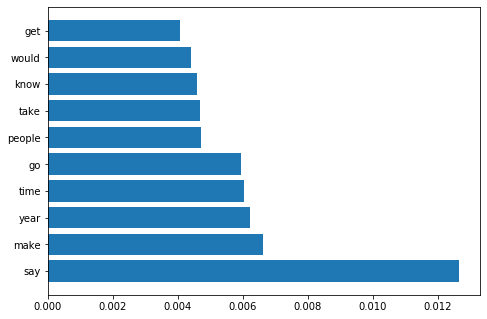

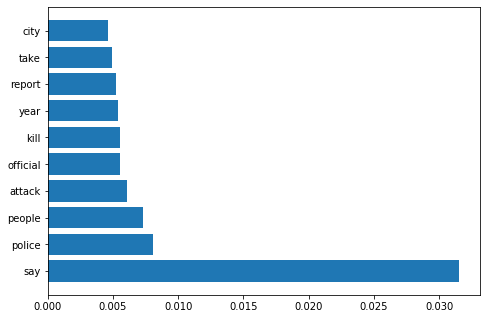

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
    list_scores = []
    words = []
    word_list = lda_model.show_topic(i)
    fig = plt.figure()
    for word,score in word_list:
        words.append(word)
        list_scores.append(score)
    ax = fig.add_axes([0,0,1,1])
    keywords = words
    print(ax.barh(keywords, list_scores))

## Number of Topics (2-19)

In [13]:
#fine tuning number of topics by comparison of coherence scores

for k in range(2,20):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k, #from 2 to 10
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    coherence = coherence_model_lda.get_coherence()
    print(k, " topics: ", coherence)


2  topics:  0.310317536805385
3  topics:  0.2956357995276347
4  topics:  0.31315092399894845
5  topics:  0.32030132932784305
6  topics:  0.3411107511824906
7  topics:  0.3589415045880339
8  topics:  0.3511506772391588
9  topics:  0.37490378957495585
10  topics:  0.35861428547162033
11  topics:  0.354716623836877
12  topics:  0.3831634800822607
13  topics:  0.36869645856024225
14  topics:  0.38784294481525494
15  topics:  0.4130005564159412
16  topics:  0.37983811822449937
17  topics:  0.38872309086877166
18  topics:  0.37200362248606456
19  topics:  0.4114394836069169


In [ ]:
# from pprint import pprint
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

##  Model with 15 topics gives highest cohrence of 0.4130005564159412

In [14]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)


from pprint import pprint
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"protest" + 0.024*"protester" + 0.017*"pipeline" + 0.015*"land" + '
  '0.010*"activist" + 0.010*"video" + 0.009*"police" + 0.009*"event" + '
  '0.008*"people" + 0.008*"water"'),
 (1,
  '0.016*"percent" + 0.014*"year" + 0.011*"say" + 0.009*"would" + '
  '0.008*"market" + 0.007*"economy" + 0.007*"money" + 0.007*"economic" + '
  '0.006*"increase" + 0.006*"job"'),
 (2,
  '0.018*"email" + 0.013*"report" + 0.012*"investigation" + 0.009*"say" + '
  '0.008*"information" + 0.008*"official" + 0.007*"campaign" + 0.006*"former" '
  '+ 0.006*"would" + 0.006*"evidence"'),
 (3,
  '0.013*"say" + 0.008*"make" + 0.008*"time" + 0.007*"go" + 0.007*"year" + '
  '0.006*"take" + 0.005*"come" + 0.005*"would" + 0.005*"see" + 0.005*"first"'),
 (4,
  '0.025*"say" + 0.021*"company" + 0.008*"year" + 0.007*"new" + '
  '0.007*"business" + 0.006*"make" + 0.006*"work" + 0.006*"also" + '
  '0.005*"include" + 0.005*"use"'),
 (5,
  '0.027*"election" + 0.025*"vote" + 0.023*"trump" + 0.015*"campaign" + '
  '0

## Alpha & Beta 

In [15]:
# # Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

for a in alpha:
    for b in beta:
        #run the model with a and b
        lda_model = gensim.models.LdaMulticore(
                                        corpus=corpus,
                                        id2word=id2word,
                                        num_topics=15,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha = a,
                                        eta = b)
        #run coherence model
        coherence_model_lda = CoherenceModel(
                                        model=lda_model, 
                                        texts=data_lemmatized, 
                                        dictionary=id2word, 
                                        coherence='c_v',
                                             )
        #get coherence score
        coherence = coherence_model_lda.get_coherence()
        print("For alpha: ", a, " ,beta: ", b, " , coherence score: ", coherence)

For alpha:  0.01  ,beta:  0.01  , coherence score:  0.3945310224589612
For alpha:  0.01  ,beta:  0.31  , coherence score:  0.4241914766758933
For alpha:  0.01  ,beta:  0.61  , coherence score:  0.5034821338870825
For alpha:  0.01  ,beta:  0.9099999999999999  , coherence score:  0.46450265708740995
For alpha:  0.01  ,beta:  symmetric  , coherence score:  0.3976608950461237
For alpha:  0.31  ,beta:  0.01  , coherence score:  0.40141324976184595


KeyboardInterrupt: 

## Final Model 

In [16]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.31)

In [46]:
from pprint import pprint
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"vaccine" + 0.002*"mercury" + 0.002*"autism" + 0.002*"vaccination" + '
  '0.002*"pour" + 0.002*"meet" + 0.001*"dan" + 0.001*"se" + 0.001*"nous" + '
  '0.001*"vaccinate"'),
 (1,
  '0.012*"percent" + 0.011*"say" + 0.009*"year" + 0.008*"people" + '
  '0.006*"study" + 0.006*"increase" + 0.006*"may" + 0.005*"health" + '
  '0.005*"many" + 0.005*"would"'),
 (2,
  '0.002*"click" + 0.001*"subscribe" + 0.001*"join" + 0.001*"abortion" + '
  '0.001*"notify" + 0.001*"email" + 0.001*"address" + '
  '0.001*"next_prev_swipe_leftright" + '
  '0.001*"alexandras_personalized_essences_psychic" + '
  '0.001*"sadna_process_read"'),
 (3,
  '0.016*"say" + 0.008*"go" + 0.007*"make" + 0.007*"time" + 0.006*"year" + '
  '0.005*"take" + 0.005*"know" + 0.005*"be" + 0.005*"would" + 0.005*"get"'),
 (4,
  '0.021*"say" + 0.016*"company" + 0.008*"year" + 0.006*"new" + 0.006*"make" + '
  '0.006*"business" + 0.005*"also" + 0.005*"would" + 0.004*"work" + '
  '0.004*"include"'),
 (5,
  '0.002*"gorka" + 0.002*"

In [47]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

In [48]:
all_topics_df

0         1         2         3         4         5         6  \
0      0.000038  0.000038  0.000038  0.016256  0.000038  0.000038  0.070070   
1      0.000036  0.000036  0.000036  0.192318  0.000036  0.000036  0.235864   
2      0.000020  0.066248  0.000020  0.000020  0.000020  0.000020  0.595069   
3      0.000049  0.018244  0.000049  0.000049  0.000049  0.000049  0.000049   
4      0.000154  0.000154  0.000154  0.223930  0.000154  0.000154  0.000154   
...         ...       ...       ...       ...       ...       ...       ...   
20795  0.000086  0.000086  0.000086  0.314904  0.000086  0.000086  0.000086   
20796  0.000028  0.000028  0.000028  0.773848  0.000028  0.000028  0.000028   
20797  0.000031  0.000031  0.000031  0.000031  0.999560  0.000031  0.000031   
20798  0.000109  0.000109  0.000109  0.000109  0.000109  0.000109  0.186708   
20799  0.000027  0.188355  0.000027  0.000027  0.131189  0.000027  0.365522   

              7         8         9        10        11        12        13  \
0      0.000038  0.318861  0.000038  0.000038  0.000038  0.594400  0.000038   
1      0.020177  0.499140  0.000036  0.000036  0.000036  0.052141  0.000036   
2      0.000020  0.000020  0.000020  0.077184  0.000020  0.261274  0.000020   
3      0.000049  0.000049  0.000049  0.981122  0.000049  0.000049  0.000049   
4      0.000154  0.000154  0.000154  0.354919  0.000154  0.419309  0.000154   
...         ...       ...       ...       ...       ...       ...       ...   
20795  0.000086  0.683973  0.000086  0.000086  0.000086  0.000086  0.000086   
20796  0.000028  0.099709  0.000028  0.000028  0.000028  0.000028  0.000028   
20797  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031  0.000031   
20798  0.000109  0.000109  0.000109  0.811879  0.000109  0.000109  0.000109   
20799  0.000027  0.033098  0.038609  0.049009  0.194001  0.000027  0.000027   

             14  
0      0.000038  
1      0.000036  
2      0.000020  
3      0.000049  
4      0.000154  
...         ...  
20795  0.000086  
20796  0.126109  
20797  0.000031  
20798  0.000109  
20799  0.000027  

[20800 rows x 15 columns]

In [49]:
import operator
dom_top = []
dom_prob = []
for i in range(20800):
    row_dict = dict(all_topics_df.loc[i])
    prob = max(row_dict.values())
    top = max(row_dict.items(), key=operator.itemgetter(1))[0]
    dom_prob.append(prob)
    dom_top.append(top)


In [50]:
df_dict = {'Dominant_Topic': dom_top, 'Perc_Contribution': dom_prob}
df_dominant = pd.DataFrame(df_dict)

In [51]:
df_dominant

Dominant_Topic  Perc_Contribution
0                  12           0.594400
1                   8           0.499140
2                   6           0.595069
3                  10           0.981122
4                  12           0.419309
...               ...                ...
20795               8           0.683973
20796               3           0.773848
20797               4           0.999560
20798              10           0.811879
20799               6           0.365522

[20800 rows x 2 columns]

In [52]:
df_analysis = pd.DataFrame(df_dominant.Dominant_Topic.value_counts())
df_analysis.columns = ['count']
df_analysis = df_analysis.reset_index()
df_analysis.columns = ['topic', 'count']

In [53]:
df_analysis

topic  count
0       8   4632
1       3   3832
2      10   3155
3       6   2025
4      12   1907
5       9   1712
6       4   1213
7       1   1141
8      11    372
9       0    353
10     13    266
11      7     88
12      2     54
13      5     32
14     14     18

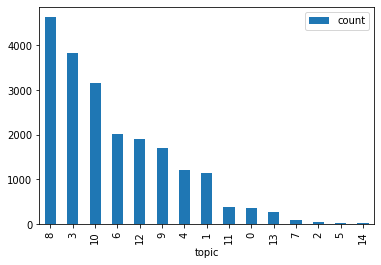

In [54]:
ax = df_analysis.plot.bar(x='topic', y='count')

## Visualizng the model

In [25]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

KeyboardInterrupt: 

Now with mds='tsne'

In [30]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,  mds='tsne')
LDAvis_prepared

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      114.344879  114.308296       1        1  21.008627
8      105.821045  -93.749626       2        1  17.356653
6     -138.334473   95.320763       3        1  13.271988
10      -7.436697  111.259697       4        1  13.257100
9     -207.550629 -105.472603       5        1   9.736863
4       52.817650   14.603765       6        1   7.768420
12     168.010849    6.806950       7        1   7.224118
1      -94.169601 -157.789551       8        1   6.935744
11    -122.849174  -39.059418       9        1   1.787989
13     -94.894264  195.408295      10        1   0.998922
7       24.927401 -180.464874      11        1   0.404697
0      -53.413467   26.832108      12        1   0.100519
14     -12.255850  -72.093201      13        1   0.072278
5     -224.217957   28.070581      14        1   0.039216
2       36.154255  209.427582      15        1   0.036874, topic_info=             Term          Freq         Total Category  logprob  loglift
342         trump  21689.000000  21689.000000  Default  30.0000  30.0000
132           say  97740.000000  97740.000000  Default  29.0000  29.0000
1042        child   7134.000000   7134.000000  Default  28.0000  28.0000
1206      company   8769.000000   8769.000000  Default  27.0000  27.0000
48          email   7792.000000   7792.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
575          sell      1.584359   3074.390869  Topic15  -7.2311   0.3347
44    development      1.422936   1574.605347  Topic15  -7.3386   0.8964
3604       design      1.428583   1967.554932  Topic15  -7.3346   0.6776
493          list      1.296100   3327.334229  Topic15  -7.4319   0.0549
972        policy      1.321457   6975.714355  Topic15  -7.4125  -0.6660

[1162 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
33408      9  0.922703  aborigine
2720       1  0.013611   abortion
2720       2  0.140301   abortion
2720       3  0.019893   abortion
2720       5  0.772702   abortion
...      ...       ...        ...
176       11  0.000034       year
7027       4  0.971130     yemeni
7027      10  0.006744     yemeni
12576      3  0.956302    zionism
9670       3  0.986827    zionist

[4866 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 7, 11, 10, 5, 13, 2, 12, 14, 8, 1, 15, 6, 3])

In [58]:
df_dominant.to_csv('lda2_15_train.csv', index=False)

In [59]:
df_testing = pd.read_csv('lda2_15_train.csv')

In [60]:
df_testing

Dominant_Topic  Perc_Contribution
0                  12           0.594400
1                   8           0.499140
2                   6           0.595069
3                  10           0.981122
4                  12           0.419309
...               ...                ...
20795               8           0.683973
20796               3           0.773848
20797               4           0.999560
20798              10           0.811879
20799               6           0.365522

[20800 rows x 2 columns]

In [61]:
df_testing[df_testing.Dominant_Topic.isna()==True]

Empty DataFrame
Columns: [Dominant_Topic, Perc_Contribution]
Index: []

In [63]:
df_testing.shape

(20800, 2)